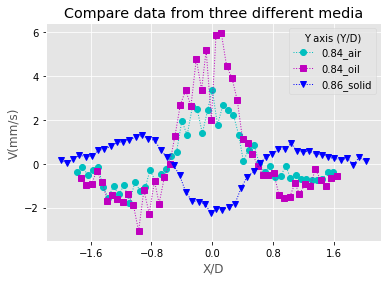

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def call_data(dataname,axis):

    df=pd.read_csv(dataname)
    df=df.drop(0).dropna(axis=1)
    df["Y"]=df["Y"].astype(float)
    df["Y"]=(df["Y"]*100).astype(int).astype(float)/100
    df["X"]=df["X"].astype(float)
    df["X"]=(df["X"]*100).astype(int).astype(float)/100
    df=df.set_index(axis,drop=1)
    return df

def show_data(medium_list,num_list,axis,v):    
    
    if (axis=="X"):
        axis2="Y"
    else:
        axis2="X"
        
    airdata=call_data(medium_list[0]+'.csv',axis)
    oildata=call_data(medium_list[1]+'.csv',axis)
    soliddata=call_data(medium_list[2]+'.csv',axis)
    
    data=[airdata,oildata,soliddata]
    plt.style.use('ggplot')
    fig,ax=plt.subplots()
    style=[':oc',':sm','v:b']
    strname=['air','oil','solid']
    for j,loc in enumerate(data):
        loc_index=loc.index.unique()
        plt.plot(loc[loc.index==loc_index[int(num_list[j])]][axis2],loc[loc.index==loc_index[int(num_list[j])]][v],
                     style[j],lw=1,label=str(loc_index[int(num_list[j])])+'_'+strname[j])

    
    ax.legend(title=axis+" axis ("+axis+"/D)")
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.set_xlabel(axis2+'/D')
    ax.set_ylabel(v+'(mm/s)')
    plt.title("Compare data from three different media")
    ax.tick_params(colors="black")
    if (axis=="X"):
        axis2="Y"
        plt.xlim(0,2.1)
    else:
        axis2="X"
    
    
    plt.show()
    
show_data(['air','oil','solid'],[20,19,14],"Y","V")
